## Portfolio Management: Clustering Investors

Asset management and investment allocation is a tedious and time-consuming process in which investment managers often must design customized approaches for each client or investor. Clustering investors based on similar characteristics can lead to simplicity and stand‐ ardization in the investment management process. These algorithms can group investors based on different factors, such as age, income, and risk tolerance. It can help investment managers identify distinct groups within their investors base.


The survey data we’re using includes responses from 10,000+ individuals in 2007 (precrisis) and 2009 (postcrisis). There are over 500 features, for this reason the dataset we will use has been reduced to have just the most meaningful feature like:
- LIFECYCL: used to approximate a person’s ability to take on risk.
- HHOUSES: indicating whether the individual is a homeowner. A value of 1 (0) implies the individual does (does not) own a home.
- SPENDMOR: represents higher spending preference

In [1]:
import pandas as pd
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# load dataset
dataset = pd.read_excel('./data/investors_survey.xlsx')

In [3]:
dataset.describe()

,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000
mean,1933.500000,3.107346,2.906363,1.353337,0.937662,3.696844,1.741593,3.042938,0.716503,2.445939,3.561045,2.976203,3.671495
std,1116.162399,1.512556,1.066253,0.478068,1.249059,1.617554,0.934443,0.879385,0.450754,0.743267,1.304197,1.462937,1.183631
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,967.250000,2.000000,2.000000,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,3.000000
50%,1933.500000,3.000000,3.000000,1.000000,0.000000,3.000000,1.000000,3.000000,1.000000,3.000000,4.000000,3.000000,4.000000
75%,2899.750000,4.000000,4.000000,2.000000,2.000000,5.000000,3.000000,4.000000,1.000000,3.000000,5.000000,4.000000,5.000000
max,3866.000000,6.000000,4.000000,2.000000,8.000000,6.000000,4.000000,4.000000,1.000000,3.000000,5.000000,5.000000,5.000000


### Data Visualization

<Axes: title={'center': 'Correlation Matrix'}>

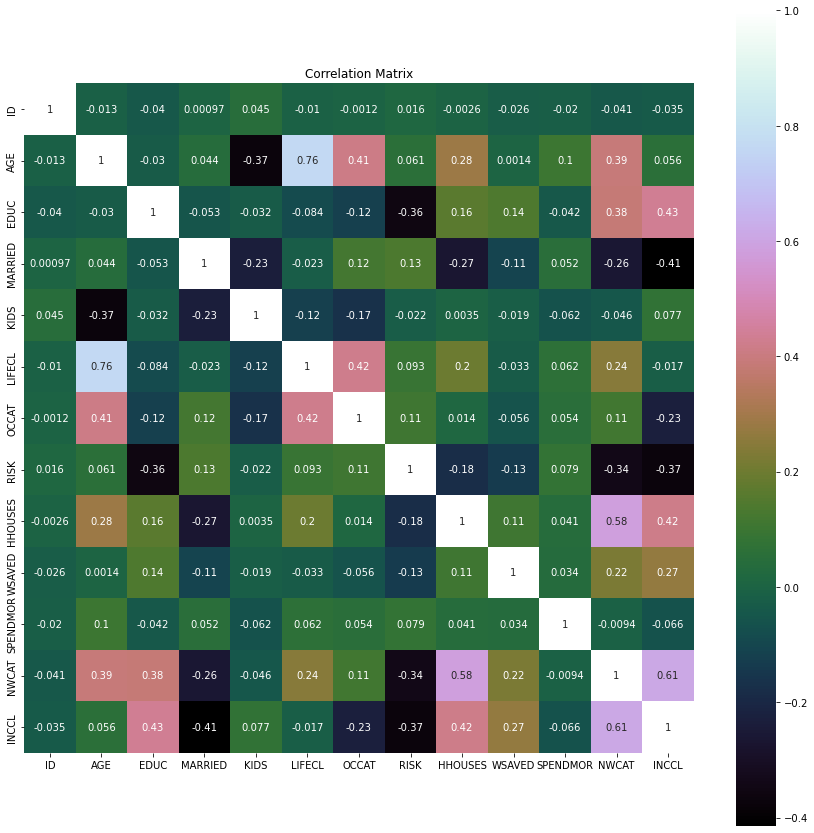

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

### Data Preparation
#### Data cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column.

In [5]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Given there isn't any missing data and the data is already in the categorical format no further data cleaning was performed. The ID column which is not needed is dropeed

In [6]:
X=dataset.copy("deep")
X=X.drop(['ID'], axis=1)
X.head()

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,3,2,1,0,2,1,3,1,1,5,3,4
1,4,4,1,2,5,2,3,0,2,5,5,5
2,3,1,1,2,3,2,2,1,2,4,4,4
3,3,1,1,2,3,2,2,1,2,4,3,4
4,4,3,1,1,5,1,2,1,3,3,5,5


#### Data transformation
The data available is comprised of attributes with similar scale. Hence no data transformation is required.

### Evaluate Algorithms and Models

In this step, we will look at the following models and perform further analysis and visualization.

- K-means
- Affinity Propagation

###  K-Means Clustering
In this step we look at the following metrices to get the optimum number of clusters

- Sum of square errors (SSE) within clusters
- Silhouette score.

#### Sum of square errors

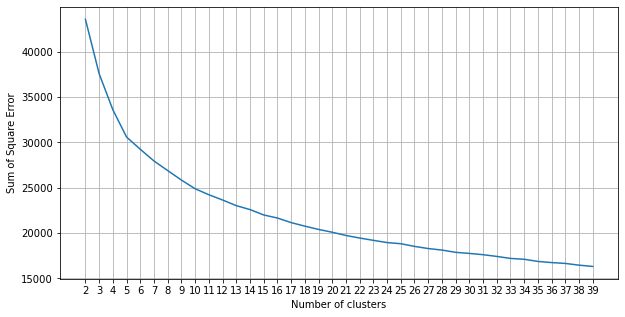

In [8]:
from sklearn.cluster import KMeans

distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)])
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

#### Silhouette score

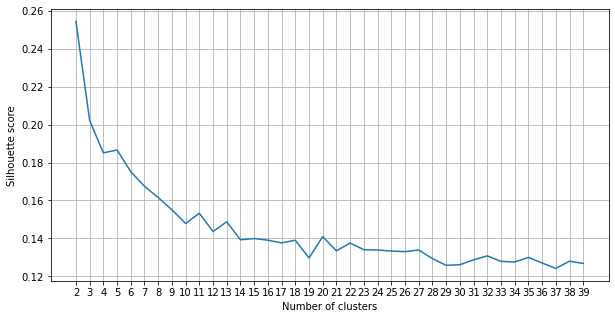

In [13]:
from sklearn import metrics

silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)        
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)])
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)

Looking at both the charts above, the optimum number of clusters seem to be around 7. We can see that as the number of clusters increase pass 6, the sum of square of errors within clusters plateaus off. From the second graph, we can see that there are various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 7 clusters, we would use 7 clusters in the k-means model below.

### Affinity Propagation

In [16]:
from sklearn.cluster import AffinityPropagation
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)


cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 161


### Cluster Evaluation

We evaluate the clusters using Silhouette Coefficient. Higher Silhouette Coefficient score means a model with better defined clusters.

In [17]:
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.12901803189529765
ap 0.09733308038970716


K-means has much higher Silhouette Coefficient as compared to the affinity propagation. Additionally, the large number of clusters resulting from the affinity propagation is untenable. In the context of the problem at hand, **having fewer clusters, or categorizations of investors, helps build simplicity and standardization in the investment management process**. It gives the users of this information (e.g., financial advisors) some manageable intuition around the representation of the clusters. Comprehending and being able to speak to six to eight investor types is much more practical than maintaining a meaningful understanding of over 100 different profiles. With this in mind, we proceed with k-means as the preferred clustering technique.

### Cluster intuition
Now we check each cluster in order to understand the intuition behind the clusters.

In [20]:
from sklearn import cluster
# Fit the k-means for 7 clusters
nclust=7
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)
#Extracting labels 
target_labels = k_means.predict(X)

cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
output=cluster_output.groupby('cluster').mean()
output

,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
cluster,,,,,,,,,,,,
0,4.671736,3.463878,1.226869,0.296578,5.353612,2.079848,2.747782,0.942966,2.629911,3.566540,4.522180,4.508238
1,1.801802,2.693694,1.639640,0.006757,1.367117,1.646396,3.231982,0.299550,2.371622,3.441441,1.486486,2.698198
2,1.890838,2.384016,1.345029,2.116959,3.368421,1.454191,3.395712,0.495127,2.231969,4.495127,1.682261,3.064327
3,2.341826,3.388535,1.365180,0.133758,1.768577,1.333333,2.704883,0.859873,2.624204,3.728238,3.539278,4.348195
4,4.830585,2.154423,1.575712,0.187406,5.616192,2.367316,3.548726,0.709145,2.266867,3.880060,2.364318,2.682159
5,1.957346,2.485782,1.272512,1.997630,3.300948,1.386256,3.248815,0.537915,2.203791,1.940758,1.845972,3.298578
6,2.510714,3.575000,1.098214,2.269643,3.144643,1.469643,2.512500,0.953571,2.687500,3.492857,4.271429,4.710714


#### Demgraphics features

<Axes: xlabel='cluster'>

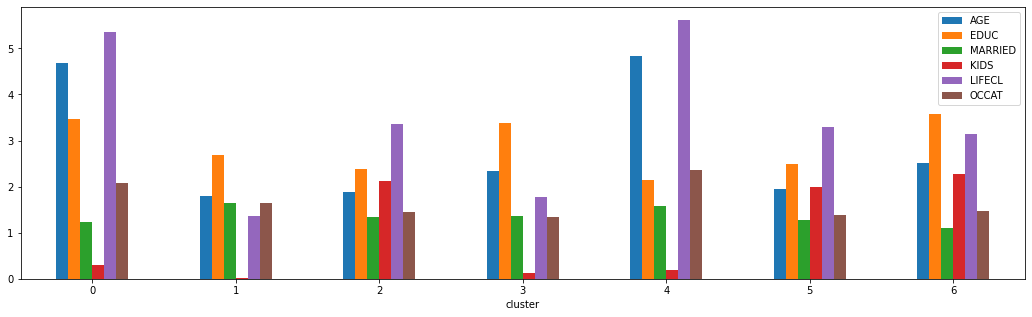

In [22]:
output[['AGE','EDUC','MARRIED','KIDS','LIFECL','OCCAT']].plot.bar(rot=0, figsize=(18,5))

The plot here shows the average value of the attributes for each of the clusters. For example, comparing cluster 3 and cluster 4, cluster 3 has lower average age, yet higher average education. In terms of marriage and number of children, these two clusters are similar. So, the individuals in cluster 3 will on an average have higher risk tolerance as compared to the individuals in cluster 4, based on the demographic attributes.

#### Financial features and willingness to take risk

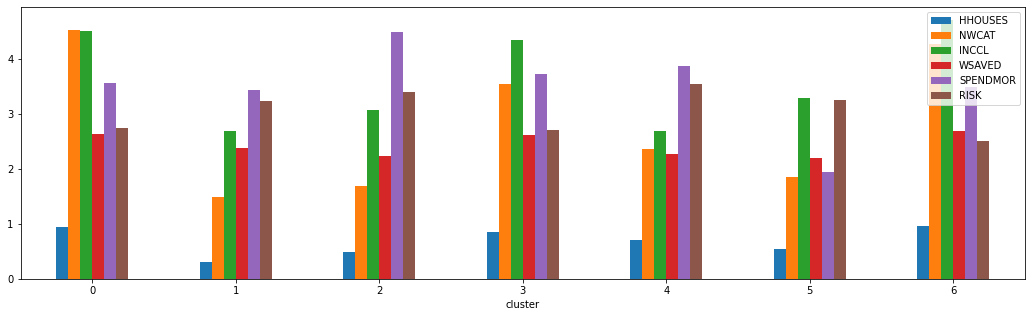

In [23]:
output[['HHOUSES','NWCAT','INCCL','WSAVED','SPENDMOR','RISK']].plot.bar(rot=0, figsize=(18,5));

The plot here shows the average value of the attributes for each of the cluster on the financial and behavioral attributes. For example, comparing cluster 3 and cluster 4, cluster 3 has higher average net worth and income (orange and green), and a lower willingness to take risk (brown). In terms of saving vs. income comparison (violet) and willingness to save, the two clusters are comparable. Therefore, we can posit that the individuals in cluster 3 will, on average, have a higher ability, yet lower willingness, to take risk compared with cluster 4.

<Axes: xlabel='cluster'>

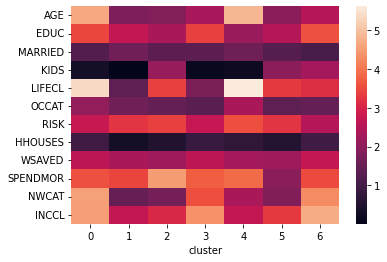

In [24]:
sns.heatmap(output.T)

Combining the information from the demographics, financial, and behavioral attributes for cluster 3 and cluster 4, the overall ability to take risk for individual cluster 3 is higher as compared to cluster 4.

We demonstrated the efficiency of clustering in discovering the natural groups of different investors based on their risk tolerance. Given that clustering algorithms can successfully group investors based on different factors (such as age, income, and risk tolerance), they can be further used by portfolio managers to standardize portfolio allocation and rebalance strategies across the clusters, making the investment management process faster and more effective.